In [218]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [1300]:
# parameters
mode = 'test2'     # ['train', 'test', 'test2']
sampl_rate = 0.001 #0.001   # [1.0, 0.5, 0.2, 0.1, 0.05, 0.01, 0.001]
# label smoothing parameters
label_smoothing = False #True     # [True, False]
alpha = 30 #10      # 10: 0.1%, 7: 1%, 3: 5%, 3: 10%, 1.5: 50%, 1: 100%
beta = 121 #31       # 61: 0.1%, 21: 1%,   7: 50%
gamma = 15 #7      # 5: 0.1%, 3: 1%,    1: 50%

In [1301]:
if mode == 'train':
#     dataset100 = pickle.load(open("./datasets_expscale/nyc_taxi_expscale_100%_1000m_5min_train_2015-01-01_2015-02-09.pkl", 'rb'))
    dataset100 = pickle.load(open("./datasets_expscale_both/nyc_taxi_expscale_100%_1000m_5min_train_2015-01-01_2015-02-09.pkl", 'rb'))
elif mode == 'test':
#     dataset100 = pickle.load(open("./datasets_expscale/nyc_taxi_expscale_100%_1000m_5min_test_2015-02-09_2015-03-01.pkl", 'rb'))
    dataset100 = pickle.load(open("./datasets_expscale_both/nyc_taxi_expscale_100%_1000m_5min_test_2015-02-09_2015-03-01.pkl", 'rb'))
elif mode == 'test2':
    dataset100 = pickle.load(open("./datasets_expscale_both/nyc_taxi_expscale_100%_1000m_5min_test2_2015-03-01_2015-04-01.pkl", 'rb'))        

In [1302]:
# dataset100 = pickle.load(open("./datasets/nyc_taxi_vdct_randsampled2_100%_1000m_10min_test_2015-02-09_2015-02-10.pkl", 'rb'))
# dataset8sEPS = pickle.load(open("./datasets/nyc_taxi_vdct_randsampled2_8%_1000m_10min_test_2015-02-09_2015-02-10_smallEPS.pkl", 'rb'))
# dataset01 = pickle.load(open("./datasets/nyc_taxi_vdct_randsampled2_0%_1000m_10min_test_2015-02-09_2015-02-10.pkl", 'rb'))

In [1303]:
# len(dataset100), len(dataset100[0]), dataset100[0][0][0].shape, dataset100[0][0][1].shape, dataset100[0][0][2].shape, dataset100[0][0][3].shape, dataset100[0][1].shape, dataset100[0][2]
len(dataset100), len(dataset100[0]), dataset100[0][0].shape, dataset100[0][1]

(8928, 2, (10, 20, 2), Timestamp('2015-03-01 00:00:00', freq='5T'))

In [1304]:
def get_labs(dataset):
    # all_vinps = np.zeros([len(dataset), dataset[0][0][0].shape[0], dataset[0][0][0].shape[1], dataset[0][0][0].shape[2]])
    # all_dinps = np.zeros([len(dataset), dataset[0][0][1].shape[0], dataset[0][0][1].shape[1], dataset[0][0][1].shape[2]])
#     all_cinps = np.zeros([len(dataset), dataset[0][0][2].shape[0], dataset[0][0][2].shape[1], dataset[0][0][2].shape[2]])
    # all_totinps = np.zeros([len(dataset), dataset[0][0][3].shape[0]])
#     all_labs = np.zeros([len(dataset), dataset[0][1].shape[0], dataset[0][1].shape[1], dataset[0][1].shape[2]])
    all_labs = np.zeros([len(dataset), dataset[0][0].shape[0], dataset[0][0].shape[1], dataset[0][0].shape[2]])
    # all_crnts = []
    # print(all_vinps.shape, all_dinps.shape, all_cinps.shape, all_totinps.shape, all_labs.shape)

    for i in range(len(dataset)):
    #     all_vinps[i] = dataset[i][0][0]# * 26
    #     all_dinps[i] = dataset[i][0][1]# * 31
#         all_cinps[i] = dataset[i][0][2]
    #     all_totinps[i] = dataset[i][0][3]
        all_labs[i] = dataset[i][0]
    #     all_crnts.append(dataset[0][2])

#     all_labs[:,:,:,0] = all_labs[:,:,:,0]# * 26
#     return all_cinps, all_labs
    return all_labs

In [1305]:
labs100 = get_labs(dataset100)
# if mode == 'test2':
#     labs100 = labs100[:,:,:,0:1]
dlabs100 = labs100[:,:,:,1:]
labs100 = labs100[:,:,:,:1]
print(labs100.shape, dlabs100.shape)

(8928, 10, 20, 1) (8928, 10, 20, 1)


In [1306]:
# cinps100, labs100 = get_labs(dataset100)
# cinps8sEPS, labs8sEPS = get_labs(dataset8sEPS)
# cinps01, labs01 = get_labs(dataset01)

In [1307]:
np.sum(labs100[:,:,:,0]), np.sum(dlabs100[:,:,:,0])

(11461015.0, 9830844.0)

In [1308]:
# cinps100.shape, cinps8sEPS.shape, cinps01.shape

In [1309]:
import copy

def sampler(labs, sigma, sampling_rate, rand_mat = None):
    print(np.min(labs[:,:,:,0]), np.max(labs[:,:,:,0]), np.mean(labs[:,:,:,0]))
    
    new_labs = np.zeros_like(labs)
    total_calls = np.sum(labs[:,:,:,0])
    avg_calls = np.mean(labs[:,:,:,0])
    std_calls = np.std(labs[:,:,:,0])
    total_bins = labs.shape[0] * labs.shape[1] * labs.shape[2]
    print("total_calls:", total_calls, "total_bins:", total_bins, "avg_calls:", avg_calls, "std_calls:", std_calls)
    cut_off = avg_calls + sigma * std_calls
#     cut_off = (total_calls / total_bins) * (1 - sampling_rate)
    print("cut_off:", cut_off)
    cutted_off = copy.deepcopy(labs[:,:,:,:])
#     cutted_off = copy.deepcopy(labs[:,:,:,0])
    cutted_off = cutted_off - cut_off
    cutted_off[cutted_off<0] = 0
#     cutted_off = np.floor(cutted_off * sampling_rate)

#     for i in range(labs.shape[0]):
#         for j in range(labs.shape[1]):
#             for k in range(labs.shape[2]):
#                 if 

    total_after_cutting_off = np.sum(cutted_off)
    cut_off_rate = np.sum(cutted_off) / np.sum(labs[:,:,:,0])
    print("total_after_cutting_off:", total_after_cutting_off, "cut-off rate:", cut_off_rate)
    
    # sampling process
#     cutted_off = np.floor(cutted_off * sampling_rate)
    if rand_mat is None:
        rand_0to1 = np.random.rand(cutted_off.shape[0], cutted_off.shape[1], cutted_off.shape[2], cutted_off.shape[3])
    else:
        rand_0to1 = rand_mat
#     cut_or_not = cutted_off/cutted_off
#     cut_or_not[np.isnan(cut_or_not)]=0
#     rand_0to1 = rand_0to1 * cut_or_not
# #     print(np.sum(cut_or_not), set(cut_or_not.flatten()))
#     rand_0to1 /= np.mean(rand_0to1)
# #     print(np.mean(rand_0to1))
#     print(np.amin(rand_0to1), np.amax(rand_0to1))
    cutted_off = np.floor(cutted_off * (rand_0to1*2) * sampling_rate)

    total_calls = np.sum(cutted_off[:,:,:,0])
    avg_calls = np.mean(cutted_off[:,:,:,0])
    std_calls = np.std(cutted_off[:,:,:,0])
    total_bins = cutted_off.shape[0] * cutted_off.shape[1] * cutted_off.shape[2]
    print("total_calls:", total_calls, "total_bins:", total_bins, "avg_calls:", avg_calls, "std_calls:", std_calls)
    
    real_sampling_rate = np.sum(cutted_off) / np.sum(labs100[:,:,:,0])
    print("real_sampling_rate:", real_sampling_rate, "(", np.sum(cutted_off), "/", np.sum(labs100[:,:,:,0]) , ")")
    
    return cutted_off, rand_0to1

In [1310]:
# np.where(labs100 == 181.0)

In [1311]:
if sampl_rate == 1.0:
    labs100cutoff = labs100     # 100% train & test
    dlabs100cutoff = dlabs100
elif sampl_rate == 0.5:
    labs100cutoff, rand_mat = sampler(labs100, 0, 0.87)   # 50% train & test
    dlabs100cutoff, _ = sampler(dlabs100, 0, 0.87, rand_mat)
elif sampl_rate == 0.2:
    labs100cutoff, rand_mat = sampler(labs100, 0.4, 0.50)   # 20% train & test
    dlabs100cutoff, _ = sampler(dlabs100, 0.4, 0.50, rand_mat)   # 20% train & test
elif sampl_rate == 0.1:
    labs100cutoff, rand_mat = sampler(labs100, 1, 0.45)   # 10% train & test
    dlabs100cutoff, _ = sampler(dlabs100, 1, 0.45, rand_mat)
elif sampl_rate == 0.05:
    labs100cutoff, rand_mat = sampler(labs100, 1.5, 0.35)   # 5% train & test
    dlabs100cutoff, _ = sampler(dlabs100, 1.5, 0.35, rand_mat)
elif sampl_rate == 0.01:
    labs100cutoff, rand_mat = sampler(labs100, 3, 0.33)   # 1% train & test
    dlabs100cutoff, _ = sampler(dlabs100, 3, 0.33, rand_mat)
elif sampl_rate == 0.001:
    labs100cutoff, rand_mat = sampler(labs100, 4.8, 0.33)     # 0.15% ~ 0.1% train & test    
    dlabs100cutoff, _ = sampler(dlabs100, 4.8, 0.33, rand_mat)   # 0.1% train
    
else:
    print("not defined.")

print(labs100cutoff.shape, dlabs100cutoff.shape)

0.0 121.0 6.4185791890681
total_calls: 11461015.0 total_bins: 1785600 avg_calls: 6.4185791890681 std_calls: 10.459850986448881
cut_off: 56.625863924022724
total_after_cutting_off: 50806.349553959815 cut-off rate: 0.00443297121188305
total_calls: 14400.0 total_bins: 1785600 avg_calls: 0.008064516129032258 std_calls: 0.2431589435396776
real_sampling_rate: 0.0012564332216649223 ( 14400.0 / 11461015.0 )
0.0 126.0 5.505625
total_calls: 9830844.0 total_bins: 1785600 avg_calls: 5.505625 std_calls: 8.980528066544787
cut_off: 48.612159719414976
total_after_cutting_off: 85718.43967892102 cut-off rate: 0.008719336781147276
total_calls: 24883.0 total_bins: 1785600 avg_calls: 0.013935371863799282 std_calls: 0.39504962466587923
real_sampling_rate: 0.002171099156575574 ( 24883.0 / 11461015.0 )
(8928, 10, 20, 1) (8928, 10, 20, 1)


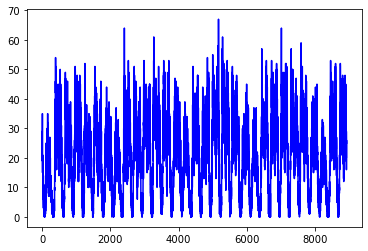

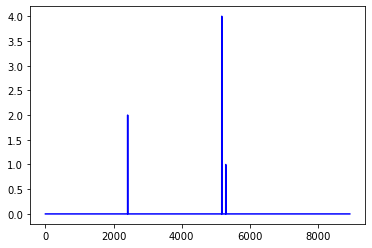

In [1312]:
loc = (4,10) #(5,12) #(5,10) #(8,11)
offset = 0 #0 #18000 #20000 #12500 #20000 #46000
duration = 10000 #500 #10000 #1440 #10000 #2500 #10000 #200 #10000 #3000 #1000

v = labs100[:,loc[0],loc[1],0]
# c = labs100[:,loc[0],loc[1],1]
# c2 = cinps100[:,loc[0],loc[1],:]
# c2 = np.mean(c2[:,150:180], axis=1)  # mean(last 30 samples)

fr = offset
to = offset+duration
plt.plot(v[fr:to], color='b')
# plt.plot((c[fr:to]-5)*60, color='c')
# plt.plot((c2[fr:to]-5)*60, color='m')
plt.show()

v = labs100cutoff[:,loc[0],loc[1],0]
# c = labs100cutoff[:,loc[0],loc[1],1]
# c = labs100[:,loc[0],loc[1],1]
    
# off = int(offset * real_sampling_rate)
# dur = int(duration * real_sampling_rate)
# fr = off
# to = off+dur
plt.plot(v[fr:to], color='b')
# plt.plot((c[fr:to]-5)*60, color='c')
plt.show()

# v = labs8sEPS[:,loc[0],loc[1],0]
# c = labs8sEPS[:,loc[0],loc[1],1]
# c2 = cinps8sEPS[:,loc[0],loc[1],:]
# c2 = np.mean(c2[:,0:25], axis=1)

# off = offset//100*8
# dur = duration//100*8
# fr = off
# to = off+dur
# plt.plot(v[fr:to], color='b')
# plt.plot(c[fr:to]-5, color='c')
# plt.plot(c2[fr:to]-5, color='m')
# plt.show()

# v = labs01[:,loc[0],loc[1],0]
# c = labs01[:,loc[0],loc[1],1]
# c2 = cinps01[:,loc[0],loc[1],:]
# c2 = np.mean(c2[:,0:5], axis=1)

# off = offset//1000
# dur = duration//1000+1
# fr = off
# to = off+dur
# plt.plot(v[fr:to], color='b')
# plt.plot(c[fr:to]-5, color='c')
# plt.plot(c2[fr:to]-5, color='m')
# # plt.plot(2.5-c2[fr:to], color='r')
# plt.show()

In [1313]:
BIN_LENGTHS = [1, 2, 3, 6, 12, 24, 36, 72, 144, 288]  # 5min * 288 = 1440
# BIN_LENGTHS = [1, 2, 3, 6, 12, 24, 36, 72, 144, 288, 576, 1152]  # 5min * 288 = 1440
max_bin = np.amax(BIN_LENGTHS) #1152 #288
INPUT_WINDOW_SIZE = len(BIN_LENGTHS)

def vary_length_bins(labs):
#     global INPUT_WINDOW_SIZE
    input_dat = np.zeros([INPUT_WINDOW_SIZE, labs.shape[1], labs.shape[2], labs.shape[3]])
    
    for i in range(INPUT_WINDOW_SIZE):
        if i == 0:            
            input_dat[-1] = labs[-1:]
        else:
#             input_dat[-i] = np.sum(labs[-i:-prev_i], axis=(1,2,3))
            input_dat[-(i+1)] = np.sum(labs[-BIN_LENGTHS[i]:-BIN_LENGTHS[prev_i]], axis=0)
        prev_i = i
    
    input_dat = input_dat[:,:,:,0]
    input_dat = np.transpose(input_dat, (1,2,0))
    
    return input_dat

In [1314]:
# [1, 2, 3, 6, 12, 24, 36, 72, 144, 288]
# a = [5, 5, 5, 15, 30, 60, 60, 180, 360, 720] 
# np.sum(a)

In [1315]:
labs100cutoff.shape
input_dats = np.zeros([len(labs100cutoff)-max_bin, labs100cutoff.shape[1], labs100cutoff.shape[2], INPUT_WINDOW_SIZE])

for i in range(len(labs100cutoff)-max_bin):
#     print(labs100cutoff[i:i+288].shape)
#     print(vary_length_bins(labs100cutoff[i:i+288]).shape)
    input_dats[i] = vary_length_bins(labs100cutoff[i:i+max_bin])
print(input_dats.shape)

dinput_dats = np.zeros([len(labs100cutoff)-max_bin, labs100cutoff.shape[1], labs100cutoff.shape[2], INPUT_WINDOW_SIZE])

for i in range(len(labs100cutoff)-max_bin):
#     print(labs100cutoff[i:i+288].shape)
#     print(vary_length_bins(labs100cutoff[i:i+288]).shape)
    dinput_dats[i] = vary_length_bins(dlabs100cutoff[i:i+max_bin])
print(dinput_dats.shape)

(8640, 10, 20, 10)
(8640, 10, 20, 10)


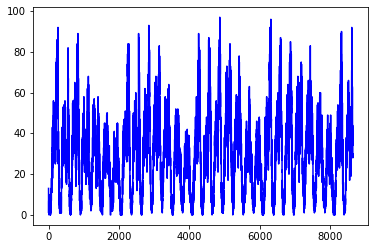

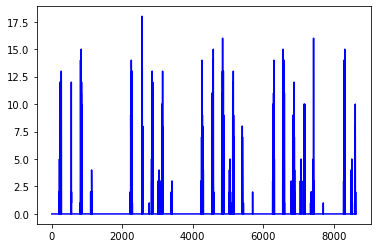

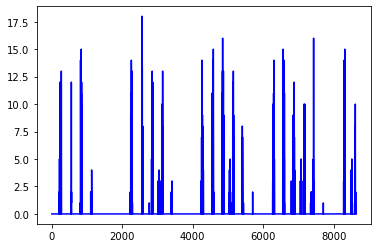

In [1316]:
loc = (5,12) #(8,11)
offset = 288 #1900 #288 #8000 #0 #18000 #20000 #12500 #20000 #46000
duration = 10000 #100 #10000 #500 #10000 #1440 #10000 #2500 #10000 #200 #10000 #3000 #1000

v = labs100[:,loc[0],loc[1],0]

fr = offset
to = offset+duration
plt.plot(v[fr:to], color='b')
plt.show()

v = labs100cutoff[:,loc[0],loc[1],0]
# off = int(offset * real_sampling_rate)
# dur = int(duration * real_sampling_rate)
# fr = off
# to = off+dur
plt.plot(v[fr:to], color='b')
plt.show()

# input_dat
v = input_dats[:,loc[0],loc[1],-1]
off = int(offset - 288)
dur = int(duration)
fr = off
to = off+dur
plt.plot(v[fr:to], color='b')
plt.show()


In [1317]:
i = 4020#+1000 #4016
min_after = 2 # 10 minutes after
gap = (max_bin-1) #+ min_after # 10 minutes after
print(gap)
input_dats[i][5][12][-1], labs100cutoff[i+gap][5][12], labs100cutoff[i+gap+min_after][5][12]

287


(0.0, array([0.]), array([0.]))

In [1318]:
input_dats.shape[0]

8640

In [1319]:
# 2015-01-01 00:00 ~ 2015-02-09 00:00
# 날짜로는 (31일 + 8일) * 24시간 * 12(5분) = 11232타임슬롯. 맞네!!

in_out_pair = np.zeros([input_dats.shape[0]-min_after, input_dats.shape[1], input_dats.shape[2], 2*input_dats.shape[3]+labs100cutoff.shape[3]], dtype=input_dats.dtype)
#print(in_out_pair.shape)

# input
# in_out_pair[:,:,:,0:input_dats.shape[3]] = input_dats[0:input_dats.shape[0]-min_after,:,:,:]
in_out_pair[:,:,:,0:input_dats.shape[3]] = dinput_dats[0:input_dats.shape[0]-min_after,:,:,:]
in_out_pair[:,:,:,input_dats.shape[3]:2*input_dats.shape[3]] = input_dats[0:input_dats.shape[0]-min_after,:,:,:]

print(-(input_dats.shape[0]-min_after))

in_out_pair[:,:,:,2*input_dats.shape[3]:2*input_dats.shape[3]+labs100cutoff.shape[3]] = labs100cutoff[-(input_dats.shape[0]-2+2):-2,:,:,:] + labs100cutoff[-(input_dats.shape[0]-2+1):-1,:,:,:]   # 그럼 한칸씩 앞으로 땡기자.

# if label_smoothing:
#     # smoothed label
#     # in_out_pair[:,:,:,input_dats.shape[3]:input_dats.shape[3]+labs100cut_and_smoothed.shape[3]] = labs100cut_and_smoothed[-(input_dats.shape[0]-min_after):,:,:,:]
#     # smoothed label: 0min ~ 5min after + 5min after ~ 10min after
#     # in_out_pair[:,:,:,input_dats.shape[3]:input_dats.shape[3]+labs100cut_and_smoothed.shape[3]] = labs100cut_and_smoothed[-(input_dats.shape[0]-2):,:,:,:] + labs100cut_and_smoothed[-(input_dats.shape[0]-2+1):-1,:,:,:]
#     in_out_pair[:,:,:,input_dats.shape[3]:input_dats.shape[3]+labs100cutoff.shape[3]] = labs100cut_and_smoothed[-(input_dats.shape[0]-2+2):-2,:,:,:] + labs100cut_and_smoothed[-(input_dats.shape[0]-2+1):-1,:,:,:]   # 그럼 한칸씩 앞으로 땡기자.
# else:
#     # for unsmoothed label
#     # in_out_pair[:,:,:,input_dats.shape[3]:input_dats.shape[3]+labs100cutoff.shape[3]] = labs100cutoff[-(input_dats.shape[0]-min_after):,:,:,:]
#     # in_out_pair[:,:,:,input_dats.shape[3]:input_dats.shape[3]+labs100cutoff.shape[3]] = labs100cutoff[-(input_dats.shape[0]-2):,:,:,:] + labs100cutoff[-(input_dats.shape[0]-2+1):-1,:,:,:]   # 한칸 건너 뛰었다?
#     in_out_pair[:,:,:,input_dats.shape[3]:input_dats.shape[3]+labs100cutoff.shape[3]] = labs100cutoff[-(input_dats.shape[0]-2+2):-2,:,:,:] + labs100cutoff[-(input_dats.shape[0]-2+1):-1,:,:,:]   # 그럼 한칸씩 앞으로 땡기자.

-8638


In [1320]:
print(in_out_pair.shape)
print(input_dats.shape[3]+labs100cut_and_smoothed.shape[3])
i = 4016 #4023+1001 #4016
# in_out_pair[i+2][5][10][-2], in_out_pair[i+3][5][10][-2], in_out_pair[i][5][10][-1]
in_out_pair[i][5][12][-2], "/", in_out_pair[i+1][5][12][-2], "+", in_out_pair[i+2][5][12][-2], "=", in_out_pair[i][5][12][-1]

(8638, 10, 20, 21)
11


(0.0, '/', 0.0, '+', 0.0, '=', 0.0)

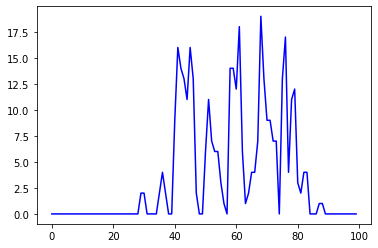

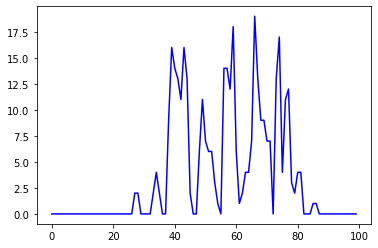

In [1321]:
loc = (5,12) #(8,11)
offset = 2200 #1900 #288 #8000 #0 #18000 #20000 #12500 #20000 #46000
duration = 100 #10000 #500 #10000 #1440 #10000 #2500 #10000 #200 #10000 #3000 #1000

# v = in_out_pair[:,loc[0],loc[1],-2]
v = in_out_pair[:,loc[0],loc[1],-3] + in_out_pair[:,loc[0],loc[1],-2]   # -15min ~ -5min

fr = offset
to = offset+duration
plt.plot(v[fr:to], color='b')
plt.show()

v = in_out_pair[:,loc[0],loc[1],-1]
plt.plot(v[fr:to], color='b')
plt.show()

In [1322]:
if mode == 'train':
    np.save(f"in_and_out3_{int(sampl_rate*100)}%_1000m_5min_train_2015-01-01_2015-02-09.npy", in_out_pair)
    print(f"in_and_out3_{int(sampl_rate*100)}%_1000m_5min_train_2015-01-01_2015-02-09.npy saved.")
elif mode == 'test':
    np.save(f"in_and_out3_{int(sampl_rate*100)}%_1000m_5min_test_2015-02-09_2015-03-01.npy", in_out_pair)
    print(f"in_and_out3_{int(sampl_rate*100)}%_1000m_5min_test_2015-02-09_2015-03-01.npy saved.")
elif mode == 'test2':
    np.save(f"in_and_out3_{int(sampl_rate*100)}%_1000m_5min_test2_2015-03-01_2015-04-01.npy", in_out_pair)
    print(f"in_and_out3_{int(sampl_rate*100)}%_1000m_5min_test2_2015-03-01_2015-04-01.npy saved.")
    
# np.save("in_and_out2_0.1%_1000m_5min_train_2015-01-01_2015-02-09.npy", in_out_pair)
# np.save("in_and_out2_0.1%_1000m_5min_test_2015-02-09_2015-03-01.npy", in_out_pair)
# np.save("in_and_out2_0.1%_1000m_5min_test2_2015-03-01_2015-04-01.npy", in_out_pair)

in_and_out3_0%_1000m_5min_test2_2015-03-01_2015-04-01.npy saved.


In [1323]:
def min5_to_10(labs):
    new_labs = np.zeros([labs.shape[0]//2, labs.shape[1], labs.shape[2], labs.shape[3]], dtype=labs.dtype)
    for i in range(labs.shape[0]//2):
        new_labs[i] += labs[i*2] + labs[i*2+1]
    
    return new_labs

In [1324]:
labs100cutoff.shape, dlabs100cutoff.shape

((8928, 10, 20, 1), (8928, 10, 20, 1))

In [1325]:
new_labs = min5_to_10(labs100cutoff)
new_dlabs = min5_to_10(dlabs100cutoff)
new_labs.shape, np.sum(new_labs), np.sum(labs100cutoff)

((4464, 10, 20, 1), 14400.0, 14400.0)

In [1326]:
labs100cutoff = new_labs
dlabs100cutoff = new_dlabs

In [1327]:
BIN_LENGTHS = list(range(1,25))  # 10min * 6 * 4hours = 24
INPUT_WINDOW_SIZE = len(BIN_LENGTHS)

def vary_length_bins(labs):
#     global INPUT_WINDOW_SIZE
    input_dat = np.zeros([INPUT_WINDOW_SIZE, labs.shape[1], labs.shape[2], labs.shape[3]])
    
    for i in range(INPUT_WINDOW_SIZE):
        if i == 0:            
            input_dat[-1] = labs[-1:]
        else:
#             input_dat[-i] = np.sum(labs[-i:-prev_i], axis=(1,2,3))
            input_dat[-(i+1)] = np.sum(labs[-BIN_LENGTHS[i]:-BIN_LENGTHS[prev_i]], axis=0)
        prev_i = i
    
    input_dat = input_dat[:,:,:,0]
    input_dat = np.transpose(input_dat, (1,2,0))
    
    return input_dat

In [1328]:
# labs100cutoff.shape
input_dats = np.zeros([len(labs100cutoff)-24, labs100cutoff.shape[1], labs100cutoff.shape[2], INPUT_WINDOW_SIZE])

for i in range(len(labs100cutoff)-24):
#     print(labs100cutoff[i:i+288].shape)
#     print(vary_length_bins(labs100cutoff[i:i+288]).shape)
    input_dats[i] = vary_length_bins(labs100cutoff[i:i+24])
print(input_dats.shape)

dinput_dats = np.zeros([len(labs100cutoff)-24, labs100cutoff.shape[1], labs100cutoff.shape[2], INPUT_WINDOW_SIZE])

for i in range(len(labs100cutoff)-24):
#     print(labs100cutoff[i:i+288].shape)
#     print(vary_length_bins(labs100cutoff[i:i+288]).shape)
    dinput_dats[i] = vary_length_bins(dlabs100cutoff[i:i+24])
print(dinput_dats.shape)

(4440, 10, 20, 24)
(4440, 10, 20, 24)


In [1329]:
print(input_dats.shape)
print(input_dats.shape[0]+24 == labs100cutoff.shape[0])
print(labs100cutoff.shape)

print(dinput_dats.shape)
print(dinput_dats.shape[0]+24 == dlabs100cutoff.shape[0])
print(dlabs100cutoff.shape)

(4440, 10, 20, 24)
True
(4464, 10, 20, 1)
(4440, 10, 20, 24)
True
(4464, 10, 20, 1)


In [1330]:
i = 100 #3000+1 #4016
min_after = 1 # 10 minutes after
gap = (4*6-1) + min_after # input: (4hours*6)*10 minutes + 10 minutes after
print(input_dats[i][5][10][-1], labs100cutoff[i+gap-1][5][10])
print(dinput_dats[i][5][10][-1], dlabs100cutoff[i+gap-1][5][10])

0.0 [0.]
0.0 [0.]


In [1331]:
# 2015-01-01 00:00 ~ 2015-02-09 00:00
# 날짜로는 (31일 + 8일) * 24시간 * 12(5분) = 11232타임슬롯. 맞네!!

in_out_pair = np.zeros([input_dats.shape[0]-min_after, input_dats.shape[1], input_dats.shape[2], 2*input_dats.shape[3]+labs100cutoff.shape[3]], dtype=input_dats.dtype)
print(in_out_pair.shape)

# input
# in_out_pair[:,:,:,0:input_dats.shape[3]] =  input_dats[0:input_dats.shape[0]-min_after,:,:,:]
in_out_pair[:,:,:,0:input_dats.shape[3]] = dinput_dats[0:input_dats.shape[0]-min_after,:,:,:]
in_out_pair[:,:,:,input_dats.shape[3]:2*input_dats.shape[3]] = input_dats[0:input_dats.shape[0]-min_after,:,:,:]

print(-(input_dats.shape[0]-min_after))
# for unsmoothed label
in_out_pair[:,:,:,2*input_dats.shape[3]:2*input_dats.shape[3]+labs100cutoff.shape[3]] = labs100cutoff[-(input_dats.shape[0]-1+1):-1,:,:,:]   # 그럼 한칸씩 앞으로 땡기자.

(4439, 10, 20, 49)
-4439


In [1332]:
print(in_out_pair.shape)
print(input_dats.shape[3]+labs100cutoff.shape[3])
i = 201 #4023+2 #4016
# in_out_pair[i+2][5][10][-2], in_out_pair[i+3][5][10][-2], in_out_pair[i][5][10][-1]
in_out_pair[i][5][10][-2], "/", in_out_pair[i+1][5][10][-2], "=", in_out_pair[i][5][10][-1]

(4439, 10, 20, 49)
25


(0.0, '/', 0.0, '=', 0.0)

In [1333]:
if mode == 'train':
    np.save(f"in_and_out3_{int(sampl_rate*100)}%_1000m_10min_train_2015-01-01_2015-02-09.npy", in_out_pair)
    print(f"in_and_out3_{int(sampl_rate*100)}%_1000m_10min_train_2015-01-01_2015-02-09.npy saved.")
elif mode == 'test':
    np.save(f"in_and_out3_{int(sampl_rate*100)}%_1000m_10min_test_2015-02-09_2015-03-01.npy", in_out_pair)
    print(f"in_and_out3_{int(sampl_rate*100)}%_1000m_10min_test_2015-02-09_2015-03-01.npy saved.")
elif mode == 'test2':
    np.save(f"in_and_out3_{int(sampl_rate*100)}%_1000m_10min_test2_2015-03-01_2015-04-01.npy", in_out_pair)
    print(f"in_and_out3_{int(sampl_rate*100)}%_1000m_10min_test2_2015-03-01_2015-04-01.npy saved.")

# np.save("in_and_out_0.1%_1000m_10min_train_2015-01-01_2015-02-09.npy", in_out_pair)
# np.save("in_and_out_0.1%_1000m_10min_test_2015-02-09_2015-03-01.npy", in_out_pair)
# np.save("in_and_out_0.1%_1000m_10min_test2_2015-03-01_2015-04-01.npy", in_out_pair)

in_and_out3_0%_1000m_10min_test2_2015-03-01_2015-04-01.npy saved.
